In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
# Load the dataset from the specified path
df = pd.read_csv(r'F:\7. Seventh Seemester Degeree\ML Assignments\bank\Churn_Modelling.csv')  # Replace with your actual path

# Display the first few rows and structure of the dataset to understand its contents
print(df.head())
print(df.info())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [19]:
X=df.drop(['Exited','CustomerId','Surname'],axis=1)
y=df['Exited']

In [20]:
labelencoder=LabelEncoder()
df['Geography']=labelencoder.fit_transform(df['Geography'])
df['Gender']=labelencoder.fit_transform(df['Gender'])

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()  # Initialize StandardScaler
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)  # Only transform the test data

In [23]:
model=Sequential()

model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

C:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.add(Dense(8, activation='relu'))

In [25]:
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7097 - loss: 0.6036 - val_accuracy: 0.8037 - val_loss: 0.4375
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4475 - val_accuracy: 0.8150 - val_loss: 0.4156
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.4235 - val_accuracy: 0.8313 - val_loss: 0.4033
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4085 - val_accuracy: 0.8325 - val_loss: 0.3924
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8240 - loss: 0.4017 - val_accuracy: 0.8313 - val_loss: 0.3868
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.3990 - val_accuracy: 0.8375 - val_loss: 0.3757
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.3839 - val_accuracy: 0.8413 - val_loss: 0.3640
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.3634 - val_accuracy: 0.

In [28]:
y_pred=(model.predict(X_test) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8565


In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1533   74]
 [ 213  180]]


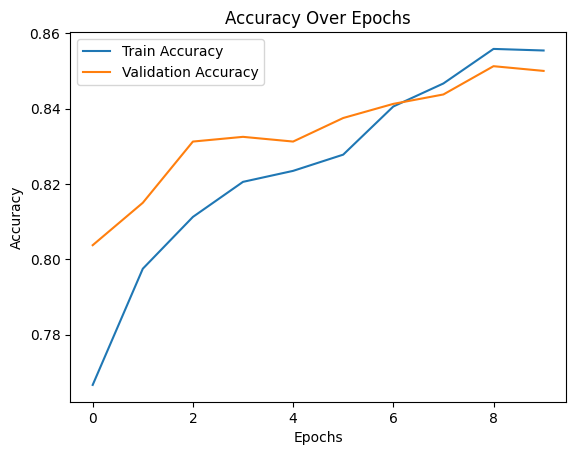

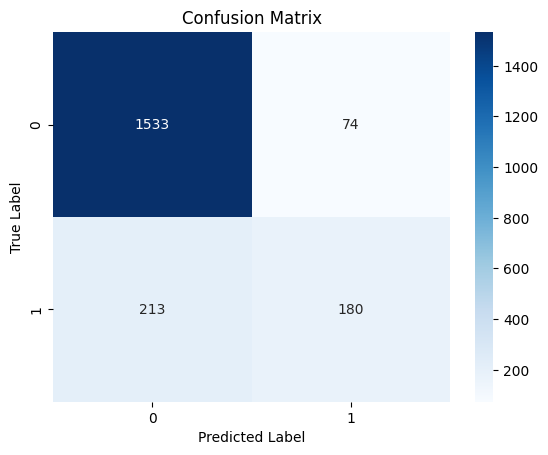

In [31]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the confusion matrix for test set predictions to evaluate model performance
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()